# IBM6: Data Analysis 2: Wrangling

<ul>
    <li>Identify and handle missing values</li>
    <li>Data standardization</li>
    <li>Data Normalization (centering / scaling)</li>
    <li>Binning</li>
    <li>Indicator variable</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identify and handle missing values

In [3]:
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for missing data

In [4]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column

In [5]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

False    205
Name: symboling, dtype: int64

False    164
True      41
Name: normalized-losses, dtype: int64

False    205
Name: make, dtype: int64

False    205
Name: fuel-type, dtype: int64

False    205
Name: aspiration, dtype: int64

False    203
True       2
Name: num-of-doors, dtype: int64

False    205
Name: body-style, dtype: int64

False    205
Name: drive-wheels, dtype: int64

False    205
Name: engine-location, dtype: int64

False    205
Name: wheel-base, dtype: int64

False    205
Name: length, dtype: int64

False    205
Name: width, dtype: int64

False    205
Name: height, dtype: int64

False    205
Name: curb-weight, dtype: int64

False    205
Name: engine-type, dtype: int64

False    205
Name: num-of-cylinders, dtype: int64

False    205
Name: engine-size, dtype: int64

False    205
Name: fuel-system, dtype: int64

False    201
True       4
Name: bore, dtype: int64

False    201
True       4
Name: stroke, dtype: int64

False    205
Name: compression-ratio, dtype: int64

F

#### Replace missing values in some columns with the mean

In [6]:
mean_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, mean_norm_loss, inplace=True)

mean_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, mean_bore, inplace=True)

mean_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, mean_stroke, inplace=True)

mean_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, mean_peak_rpm, inplace=True)

mean_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)

#### Inspect the values in a particular column

In [7]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [8]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [9]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

#### Drop all the rows that have no price data

In [10]:
# setting axis=0, drop rows which contain missing values.
df.dropna(subset=['price'], axis=0, inplace=True)

# reset index because we dropped some rows
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct Data Format

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Convert data types to proper format

In [13]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [14]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

In [15]:
df["city-mpg"].head()

0    21
1    21
2    19
3    24
4    18
Name: city-mpg, dtype: int64

#### Convert miles per gallon to Liters per 100 km (235 divided by mpg)

In [16]:
df['city-L/100km'] = 235/df["city-mpg"]
df['city-L/100km'].head()

0    11.190476
1    11.190476
2    12.368421
3     9.791667
4    13.055556
Name: city-L/100km, dtype: float64

#### Do the same for highway-mpg, transforming in the same column and renaming to "highway-L/100km

In [17]:
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns={'highway-mpg': 'highway-L/100km'}, inplace=True)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


### Data Normalization

#### Replace (original value) by (original value)/(maximum value)

In [19]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning

#### Convert data to the correct format

In [20]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

#### Plot a histogram to see the distribution of horsepower

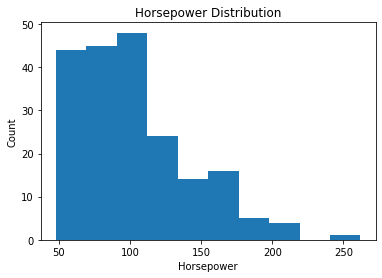

In [21]:
plt.hist(df['horsepower'])

plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower Distribution')

plt.show()

#### We would like 3 bins of equal size. We build an array, with a minimum value to a maximum value. To produce 3 bins we need 4 delimiting markers.

In [22]:
bin_del = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)

#### Set group names

In [23]:
group_names = ['Low', 'Medium', 'High']

#### Apply the function <code>cut</code> to determine what bin each column value belongs to

In [24]:
df['horsepower-binned'] = pd.cut(
    df['horsepower'], 
    bin_del, 
    labels=group_names,
    include_lowest=True
)

df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


#### Check the number of vehicles in each bin

In [25]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

#### Use a bar plot to visualize the counts in each bin

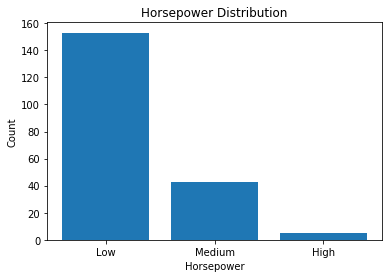

In [26]:
plt.bar(group_names, df['horsepower-binned'].value_counts())

plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower Distribution')

plt.show()

#### Histogram with bins

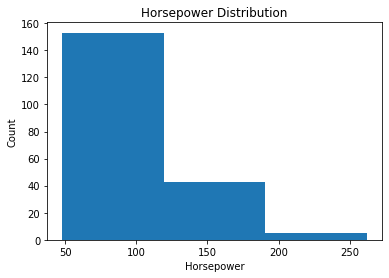

In [27]:
plt.hist(df['horsepower'], bins=3)

plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Horsepower Distribution')

plt.show()

### Indicator Variable (A.k.a dummy variable)

#### In order to use categorical values for regression analysis

In [28]:
dummy1 = pd.get_dummies(df["fuel-type"])
dummy1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [29]:
dummy1.rename(
    columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, 
    inplace=True
)

dummy1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### Insert into into original DataFrame

In [30]:
# axis=1 means rows, concat merges
df = pd.concat([df, dummy1], axis=1)

# drop 'fule-type' from DataFrame
df.drop('fuel-type', axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


#### Create indicator/dummy variables for the column 'aspiration', with 'std' set to 0 and 'turbo' to 1.

In [31]:
dummy2 = pd.get_dummies(df['aspiration'])
dummy2.rename(
    columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'},
    inplace=True
)
dummy2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


#### Merge with the rest of the Dataset and drop the column 'aspiration'

In [32]:
df = pd.concat([df, dummy2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [33]:
df.to_csv('clean_df_nu.csv')